# Підготовка та аналіз даних 
## Лабораторна робота №4
### Структури для роботи з великими обсягами даних в Python
### ФБ-21 Каюн Вероніка
<b>Мета роботи:</b> отримати навички роботи із структурами для зберігання в Python (python, numpy, pandas, numpy array, dataframe, timeit)



  # Рівень 2
  

1. Поборотися із зниклими даними.

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
soybean_large = fetch_ucirepo(id=90) 
  
# data (as pandas dataframes) 
X = soybean_large.data.features 
y = soybean_large.data.targets 
  
# metadata 
print(soybean_large.metadata) 
  
# variable information 
print(soybean_large.variables) 

{'uci_id': 90, 'name': 'Soybean (Large)', 'repository_url': 'https://archive.ics.uci.edu/dataset/90/soybean+large', 'data_url': 'https://archive.ics.uci.edu/static/public/90/data.csv', 'abstract': "Michalski's famous soybean disease database", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 307, 'num_features': 35, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1980, 'last_updated': 'Sun Feb 11 2024', 'dataset_doi': '10.24432/C5JG6Z', 'creators': ['R.S. Michalski', 'R.L. Chilausky'], 'intro_paper': None, 'additional_info': {'summary': 'There are 19 classes, only the first 15 of which have been used in prior work. The folklore seems to be that the last four classes are unjustified by the data since they have so few examples. There are 35 categorical attributes, some nominal and some ordered.  The

In [5]:
X

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,int-discolor,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,6.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,2.0,1.0,0.0,2.0,0.0,2.0,1.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,2.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,1.0,1.0,NaN,0.0,NaN,1.0,0.0,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
304,0.0,1.0,NaN,0.0,NaN,0.0,3.0,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
305,1.0,1.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [6]:
# Заміна пропущених значень на середнє
df= X.fillna(X.mean())
df


,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,int-discolor,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,6.000000,0.000000,2.000000,1.00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,4.000000,0.000000,2.000000,1.00,0.000000,2.000000,0.000000,2.000000,1.000000,1.00000,...,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3.000000,0.000000,2.000000,1.00,0.000000,1.000000,0.000000,2.000000,1.000000,2.00000,...,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3.000000,0.000000,2.000000,1.00,0.000000,1.000000,0.000000,2.000000,0.000000,1.00000,...,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,6.000000,0.000000,2.000000,1.00,0.000000,2.000000,0.000000,1.000000,0.000000,2.00000,...,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,3.529412,0.464883,1.577703,1.13,0.206767,1.816993,1.633987,0.778195,0.548872,1.01476,...,0.135135,0.033784,0.549645,1.084559,0.183453,0.111511,0.102941,0.097122,0.058824,0.156667
303,1.000000,1.000000,1.577703,0.00,0.206767,1.000000,0.000000,0.778195,0.548872,1.01476,...,0.135135,0.033784,3.000000,1.084559,0.183453,0.111511,0.102941,0.097122,0.058824,1.000000
304,0.000000,1.000000,1.577703,0.00,0.206767,0.000000,3.000000,0.778195,0.548872,1.01476,...,0.135135,0.033784,3.000000,1.084559,0.183453,0.111511,0.102941,0.097122,0.058824,1.000000
305,1.000000,1.000000,1.577703,0.00,0.206767,0.000000,0.000000,0.778195,0.548872,1.01476,...,0.135135,0.033784,3.000000,1.084559,0.183453,0.111511,0.102941,0.097122,0.058824,1.000000


2. Пронормувати вибраний датасет або стандартизувати його (нормалізація і стандартизація мають бути реалізовані як окремі
функції без застосування додаткових бібліотек, як наприклад sklearn.preprocessing).

In [7]:
import pandas as pd
# Обчислення мінімальних і максимальних значень кожного стовпця
min_vals = df.min()
max_vals = df.max()

# Нормалізація кожного стовпця за формулою
norm_data = (df - min_vals) / (max_vals - min_vals)

# Виведення нормалізованих даних
norm_data.head()


,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,int-discolor,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,1.000000,0.0,1.0,0.5,0.0,0.333333,0.333333,0.5,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.666667,0.0,1.0,0.5,0.0,0.666667,0.000000,1.0,0.5,0.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.500000,0.0,1.0,0.5,0.0,0.333333,0.000000,1.0,0.5,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.500000,0.0,1.0,0.5,0.0,0.333333,0.000000,1.0,0.0,0.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.0,1.0,0.5,0.0,0.666667,0.000000,0.5,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

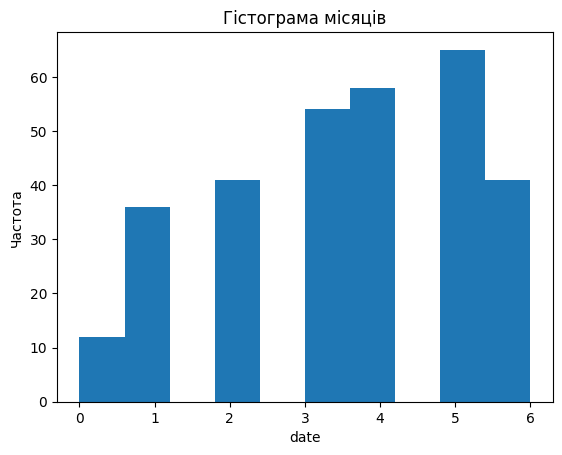

In [8]:
import matplotlib.pyplot as plt

# Побудова гістограми для атрибуту "date"
plt.hist(df['date'], bins=10)  # Розділити дані на 10 діапазонів
plt.xlabel('date')
plt.ylabel('Частота')
plt.title('Гістограма місяців')
plt.show()



4. Збудувати графік залежності одного integer/real атрибута від іншого.

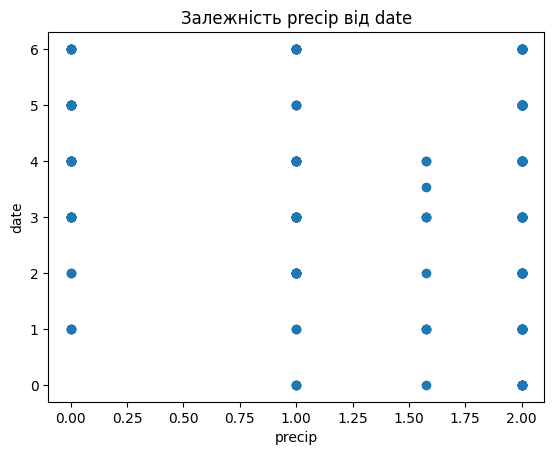

In [9]:
import matplotlib.pyplot as plt

# Збудувати графік залежності атрибута "date" від атрибуту "precip"
plt.scatter(df['precip'], df['date'])
plt.xlabel('precip')
plt.ylabel('date')
plt.title('Залежність precip від date')
plt.show()



5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів.

In [10]:
from scipy.stats import pearsonr, spearmanr

# Обчислення коефіцієнта Пірсона
pearson_corr, _ = pearsonr(df['precip'], df['date'])
print("Коефіцієнт Пірсона:", pearson_corr)

# Обчислення коефіцієнта Спірмена
spearman_corr, _ = spearmanr(df['precip'], df['date'])
print("Коефіцієнт Спірмена:", spearman_corr)



Коефіцієнт Пірсона: -0.06878347370122964
Коефіцієнт Спірмена: -0.012351765140638226


6. Провести One Hot Encoding категоріального string атрибуту.

In [11]:
from sklearn.preprocessing import OneHotEncoder

# Ініціалізація OneHotEncoder
encoder = OneHotEncoder()

# Перетворення категоріального атрибуту "date" в числовий формат
date_encoded = encoder.fit_transform(df['date'].values.reshape(-1, 1))

# Застосування One Hot Encoding
date_onehot = date_encoded.toarray()

# Вивід результату
print("Розмірність після One Hot Encoding:", date_onehot.shape)
print("Перші 5 рядків після One Hot Encoding:\n", date_onehot[:5])


Розмірність після One Hot Encoding: (307, 8)
Перші 5 рядків після One Hot Encoding:
 [[0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


7. Провести візуалізацію багатовимірних даних, використовуючи приклади, наведені у медіумі - https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57.

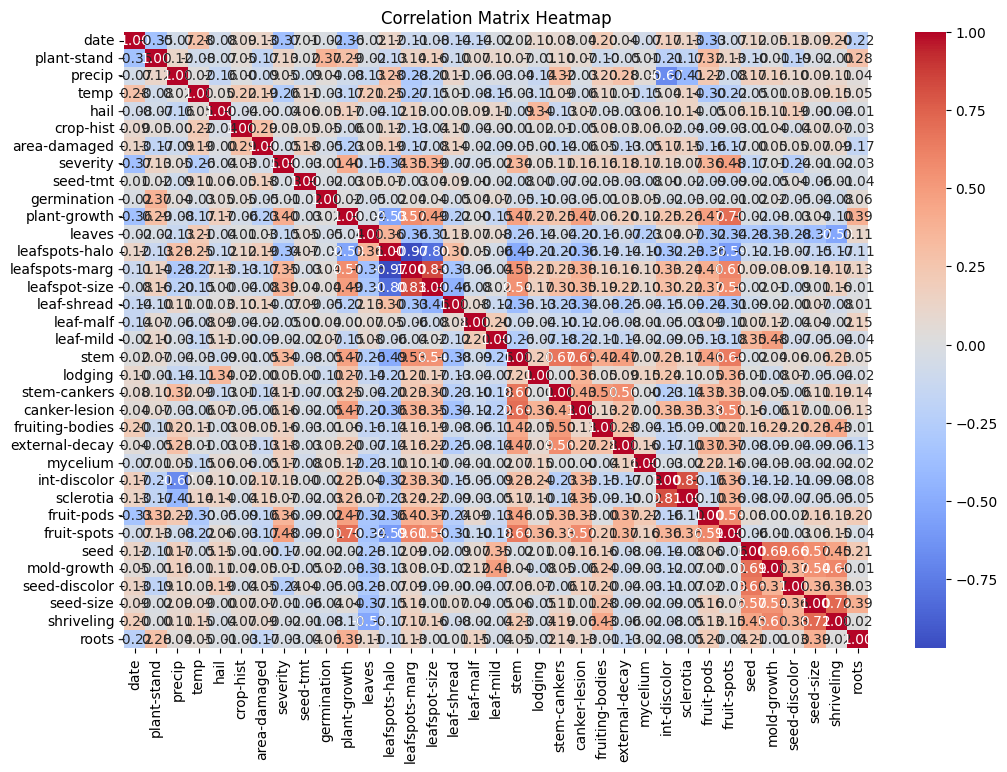

In [12]:
import seaborn as sns

# Побудова теплової карти матриці кореляції
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()
